# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

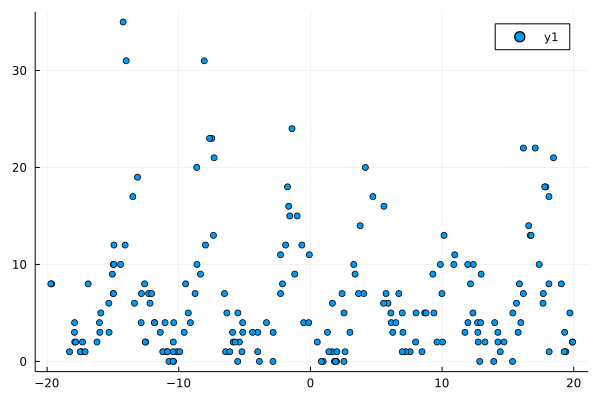

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -574.2990399042316
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.483387 seconds (6.99 M allocations: 444.966 MiB, 3.37% gc time, 94.33% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.6268648613425922, 0.4593730523598133, 0.2641878511634346, 0.4748474437581473, 0.32592394408753067, 0.42574839105924034, 0.6330883797783058, 0.16943604652769437, 0.6033563621779978, 0.5289248716132405  …  0.19015851632693348, 0.2684427814613405, 0.43964311901778735, 0.49884985274795896, 0.5892447067687496, 0.20769369616798605, 0.5980318014414335, 0.3274245945371292, 0.518622212740872, 0.5578959894643849], θ = [13.558873596074083, 3.9311121318489284, 7.953792333516897, 5.398933201479895, 2.478102080758805, 12.314546573265185, 17.42195571629481, 4.489265102109361, 2.4268213984380553, 3.4206228207837617  …  3.9879900061390194, 6.958264833499887, 3.9367927371409546, 3.9190631364598705, 2.916109235116632, 5.978524298558686, 7.284188771320914, 3.4690629550909655, 2.934518438837718, 9.748453172799989]), opt_state = (NamedTuple(),), hyperopt_state = (Name

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -737.9556473008846
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.569434 seconds (4.44 M allocations: 311.764 MiB, 12.68% gc time, 96.51% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.572707631511932) infered by Analytic Variational Inference , (local_vars = (c = [0.6108999105515588, 0.6831091462302631, 0.16300476657848945, 0.4040880419545963, 0.5348746530835072, 0.32879154889304896, 0.6272109203283354, 0.3412321568402661, 0.8017827525995193, 0.7577506786472002  …  0.29318130985101026, 0.16374367418797653, 0.6247224075914278, 0.7132537165586126, 0.7928492390616659, 0.3055362283831275, 0.5647239052151656, 0.5358763377249312, 0.7374239775490782, 0.5159884938084632], θ = [13.65975891148036, 6.055178658688336, 9.032793363894962, 5.8797836468413704, 4.410021296970416, 12.982978375574781, 17.485454210618286, 6.13905023760004, 4.717242724486464, 5.621957793287534  …  5.523678535054693, 8.050367293415928, 5.9599906098050806, 6.079844387761154, 5.210369665070339, 7.513722594285735, 7.463736546002934, 5.388815756649218, 5.158938259124281, 10.022156693918857], γ = [5.163913688081911, 9.577664496317826, 7.105570078

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

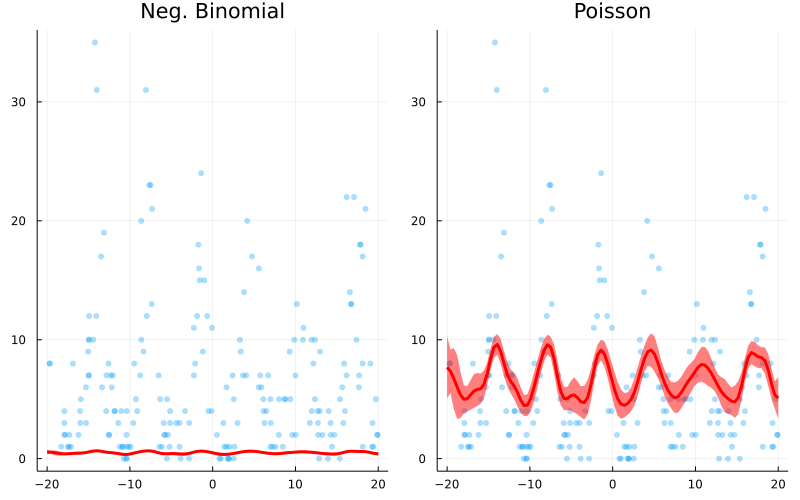

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*